In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# If we plan to do geographic plots (optional)
import geopandas as gpd

%matplotlib inline
sns.set_style("whitegrid")


In [2]:
# Cell 2: Load dataset
file_path = "../data/AB_NYC_2019.csv"
df = pd.read_csv(file_path)
df.shape


(48895, 16)

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Cell 4: Info & missing values
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# Cell 5: Remove '$' and convert to integer
df['price'] = df['price'].astype(str).str.replace('[$,]', '', regex=True).astype(int)
df['price'].dtype


dtype('int64')

In [6]:
# Summary of price
df['price'].describe()


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [7]:
# Cell 7: Count missing in these columns
df['reviews_per_month'].isna().sum(), df['last_review'].isna().sum()


(np.int64(10052), np.int64(10052))

In [8]:
# Fill missing reviews_per_month with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [9]:
# Parse last_review dates
df['last_review'] = pd.to_datetime(df['last_review'], format='%m/%d/%Y', errors='coerce')


In [10]:
# Cell 10: List columns
df.columns.tolist()


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [11]:
# Cell 11: Drop unnecessary columns
df = df.drop(columns=['id', 'name', 'host_id', 'host_name'])
df.head(3)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,NaT,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,NaT,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365


In [12]:
# Cell 12: Title-case and strip whitespace for neighborhood columns
df['neighbourhood_group'] = df['neighbourhood_group'].str.title().str.strip()
df['neighbourhood']       = df['neighbourhood'].str.title().str.strip()


In [13]:
#: Rename for clarity
df = df.rename(columns={'calculated_host_listings_count': 'num_listings'})
df.head(3)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,num_listings,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,NaT,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,NaT,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365


In [14]:
# Create 'price_per_min_night' column
df['price_per_min_night'] = df['price'] / df['minimum_nights']
df['price_per_min_night'].describe()


count    48895.000000
mean        70.174247
std        157.620388
min          0.000000
25%         20.000000
50%         44.500000
75%         81.500000
max       8000.000000
Name: price_per_min_night, dtype: float64

In [15]:
# Create categorical bins for 'availability_365'
df['avail_bin'] = pd.cut(
    df['availability_365'],
    bins=[-1, 0, 30, 180, 365],
    labels=['0 days', '1–30 days', '31–180 days', '181–365 days']
)
df['avail_bin'].value_counts().sort_index()


avail_bin
0 days          17533
1–30 days        5274
31–180 days     11724
181–365 days    14364
Name: count, dtype: int64

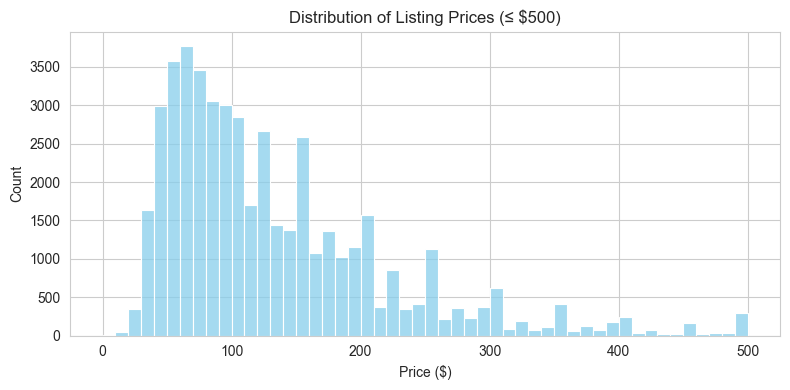

Listings with price > $500: 1044


In [16]:
# Histogram of price (cap at $500)
plt.figure(figsize=(8, 4))
sns.histplot(
    df[df['price'] <= 500]['price'],
    bins=50,
    kde=False,
    color='skyblue'
)
plt.title("Distribution of Listing Prices (≤ $500)")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Count how many listings exceed $500
count_over_500 = (df['price'] > 500).sum()
print(f"Listings with price > $500: {count_over_500}")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_48844\784541241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


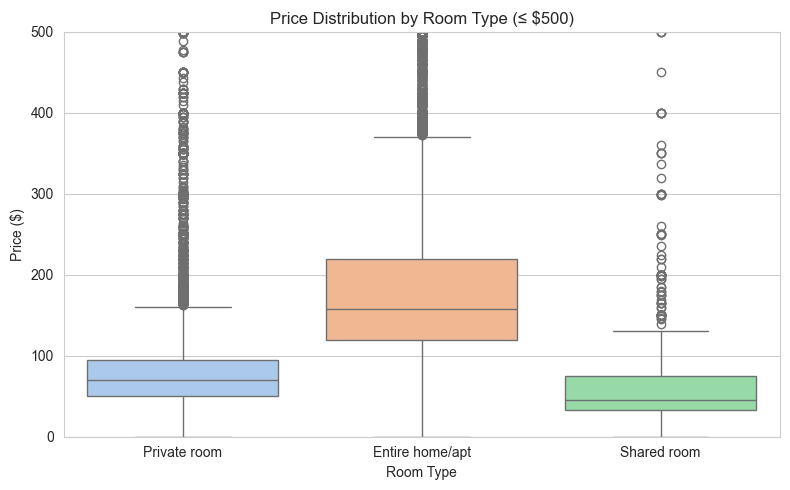

In [17]:
# Boxplot of price by room_type (cap at $500)
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='room_type',
    y='price',
    data=df[df['price'] <= 500],
    palette='pastel'
)
plt.title("Price Distribution by Room Type (≤ $500)")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.ylim(0, 500)
plt.tight_layout()
plt.show()


In [18]:
# Group by neighbourhood_group and compute count, mean, median
group_price = df.groupby('neighbourhood_group')['price'] \
                .agg(['count', 'mean', 'median']) \
                .sort_values('mean', ascending=False)
group_price


,count,mean,median
neighbourhood_group,,,
Manhattan,21661,196.875814,150.0
Brooklyn,20104,124.383207,90.0
Staten Island,373,114.812332,75.0
Queens,5666,99.517649,75.0
Bronx,1091,87.496792,65.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_48844\3877080249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


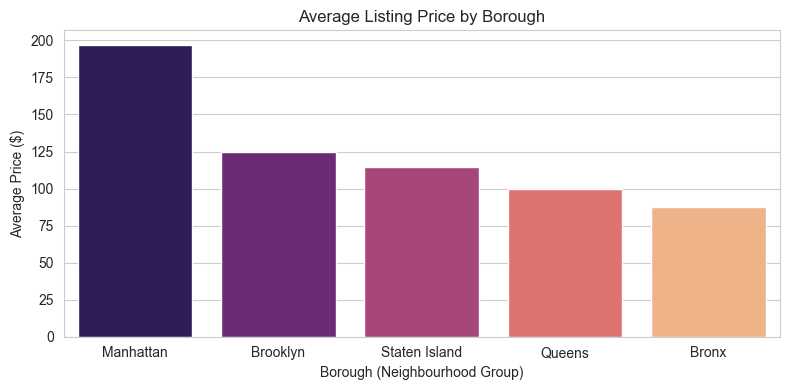

In [19]:
# Bar chart of mean price by neighbourhood_group
plt.figure(figsize=(8, 4))
sns.barplot(
    x=group_price.index,
    y=group_price['mean'],
    palette='magma'
)
plt.title("Average Listing Price by Borough")
plt.xlabel("Borough (Neighbourhood Group)")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()


In [20]:
# Cell 20: Identify the top 10 neighbourhoods by listing count
top_neigh = df['neighbourhood'].value_counts().head(10).index.tolist()
top_neigh


['Williamsburg',
 'Bedford-Stuyvesant',
 'Harlem',
 'Bushwick',
 'Upper West Side',
 "Hell'S Kitchen",
 'East Village',
 'Upper East Side',
 'Crown Heights',
 'Midtown']

In [21]:
# Compute median price for these top 10 neighbourhoods
neigh_price = (
    df[df['neighbourhood'].isin(top_neigh)]
    .groupby('neighbourhood')['price']
    .median()
    .sort_values(ascending=False)
)
neigh_price


neighbourhood
Midtown               210.0
Hell'S Kitchen        168.0
Upper West Side       150.0
East Village          150.0
Upper East Side       149.0
Williamsburg          105.0
Harlem                 89.0
Crown Heights          85.0
Bedford-Stuyvesant     80.0
Bushwick               65.0
Name: price, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_48844\993845239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


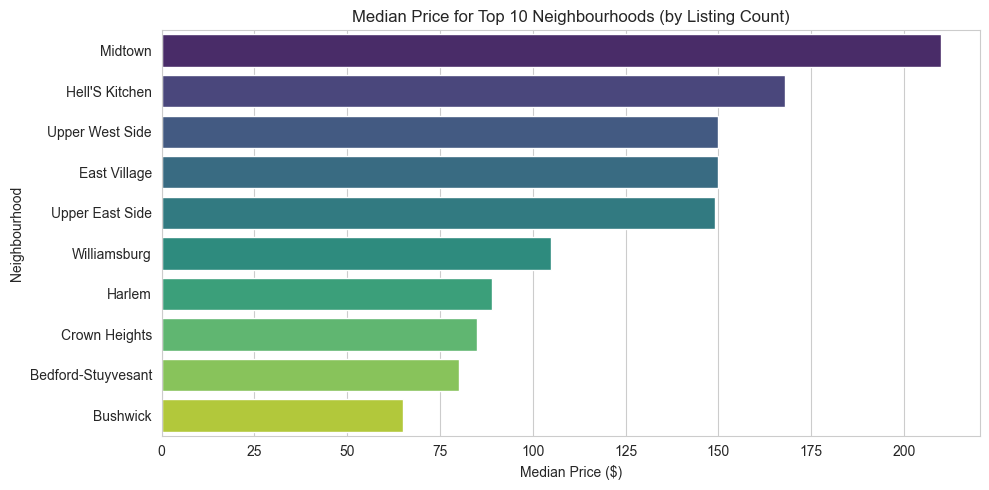

In [22]:
# Cell 22: Bar chart of median price by neighbourhood (top 10)
plt.figure(figsize=(10, 5))
sns.barplot(
    x=neigh_price.values,
    y=neigh_price.index,
    palette='viridis'
)
plt.title("Median Price for Top 10 Neighbourhoods (by Listing Count)")
plt.xlabel("Median Price ($)")
plt.ylabel("Neighbourhood")
plt.tight_layout()
plt.show()


In [23]:
# Pivot table of median price, indexed by borough and columns = room_type
pivot_table = df.pivot_table(
    index='neighbourhood_group',
    columns='room_type',
    values='price',
    aggfunc='median'
)
pivot_table


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,100.0,53.5,40.0
Brooklyn,145.0,65.0,36.0
Manhattan,191.0,90.0,69.0
Queens,120.0,60.0,37.0
Staten Island,100.0,50.0,30.0


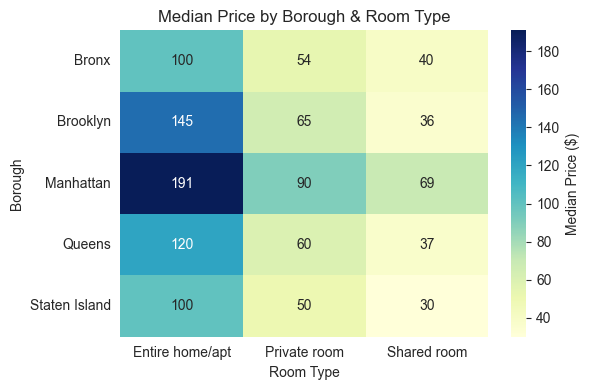

In [24]:
# Heatmap of median price
plt.figure(figsize=(6, 4))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".0f",
    cmap='YlGnBu',
    cbar_kws={'label': 'Median Price ($)'}
)
plt.title("Median Price by Borough & Room Type")
plt.xlabel("Room Type")
plt.ylabel("Borough")
plt.tight_layout()
plt.show()


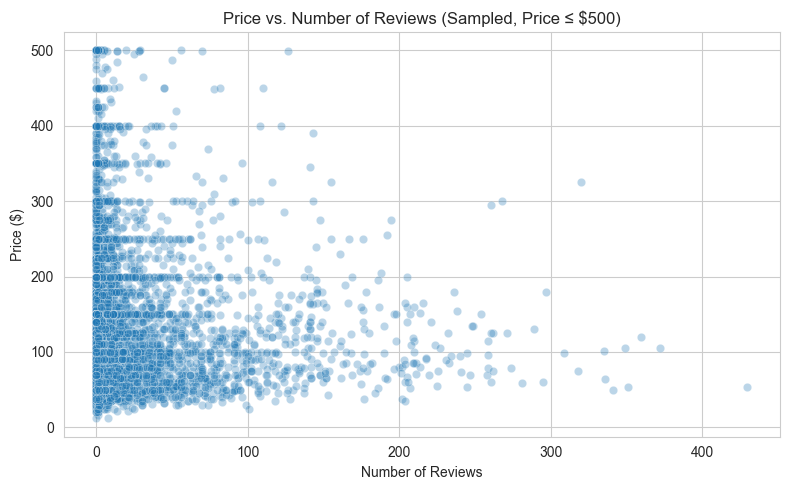

In [25]:
# Sample 5000 listings with price ≤ $500 for plotting
subset_reviews = df[df['price'] <= 500].sample(n=5000, random_state=42)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='number_of_reviews',
    y='price',
    data=subset_reviews,
    alpha=0.3
)
plt.title("Price vs. Number of Reviews (Sampled, Price ≤ $500)")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_48844\1590657344.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_bin = subset_reviews.groupby('review_bin')['price'].median().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_48844\1590657344.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


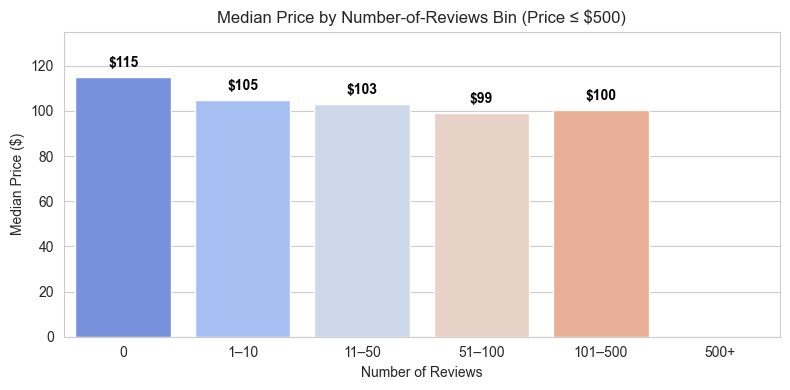

In [26]:
#Bin number_of_reviews into categories
subset_reviews['review_bin'] = pd.cut(
    subset_reviews['number_of_reviews'],
    bins=[-1, 0, 10, 50, 100, 500, float('inf')],
    labels=['0', '1–10', '11–50', '51–100', '101–500', '500+']
)

# Compute actual median price per bin
median_by_bin = subset_reviews.groupby('review_bin')['price'].median().reset_index()

# Plot
plt.figure(figsize=(8, 4))
barplot = sns.barplot(
    x='review_bin',
    y='price',
    data=median_by_bin,
    palette='coolwarm'
)
# Annotate each bar with its median value
for idx, row in median_by_bin.iterrows():
    barplot.text(
        idx,
        row['price'] + 3,
        f"${row['price']:.0f}",
        color='black',
        ha='center',
        va='bottom',
        fontweight='bold'
    )
plt.title("Median Price by Number-of-Reviews Bin (Price ≤ $500)")
plt.xlabel("Number of Reviews")
plt.ylabel("Median Price ($)")
plt.ylim(0, median_by_bin['price'].max() + 20)
plt.tight_layout()
plt.show()


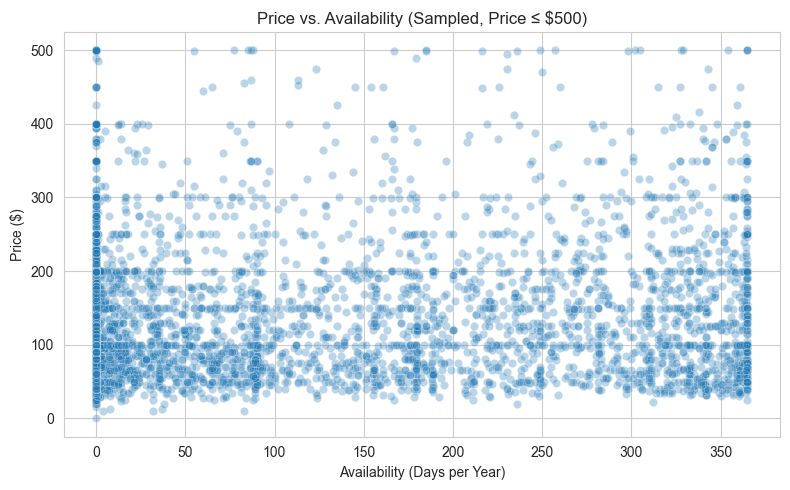

In [27]:
#Scatter of price vs. availability_365 (cap price ≤ $500)
subset_avail = df[df['price'] <= 500].sample(n=5000, random_state=24)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='availability_365',
    y='price',
    data=subset_avail,
    alpha=0.3
)
plt.title("Price vs. Availability (Sampled, Price ≤ $500)")
plt.xlabel("Availability (Days per Year)")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_48844\665349287.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_price_by_avail = df.groupby('avail_bin')['price'].median().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_48844\665349287.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


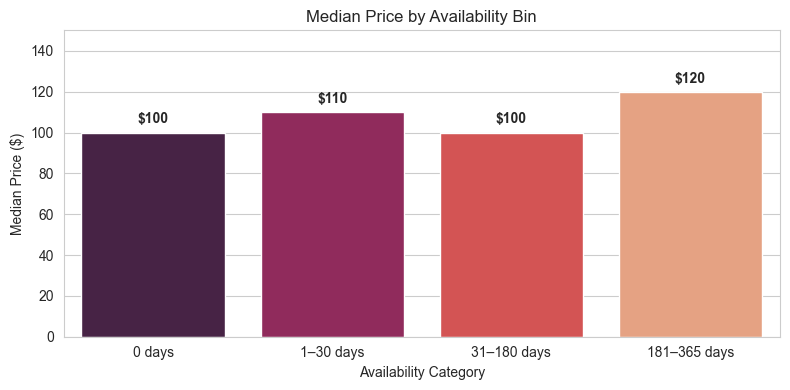

In [29]:
#Compute median price by availability bin, then plot and annotate
median_price_by_avail = df.groupby('avail_bin')['price'].median().reset_index()

plt.figure(figsize=(8, 4))
ax = sns.barplot(
    x='avail_bin',
    y='price',
    data=median_price_by_avail,
    palette='rocket'
)

# Annotate each bar with its median price
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x-position: center of bar
        height + 3,                         # y-position: slightly above bar top
        f"${height:.0f}",                   # label = price rounded to integer
        ha='center',                        # horizontal alignment: center
        va='bottom',                        # vertical alignment: bottom
        fontweight='bold'
    )

plt.title("Median Price by Availability Bin")
plt.xlabel("Availability Category")
plt.ylabel("Median Price ($)")
plt.ylim(0, median_price_by_avail['price'].max() + 30)  # add some headroom
plt.tight_layout()
plt.show()


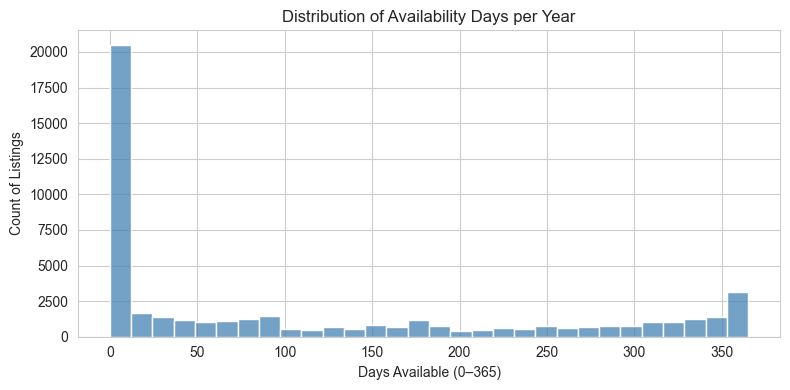

In [30]:
# Histogram of availability_365
plt.figure(figsize=(8, 4))
sns.histplot(df['availability_365'], bins=30, kde=False, color='steelblue')
plt.title("Distribution of Availability Days per Year")
plt.xlabel("Days Available (0–365)")
plt.ylabel("Count of Listings")
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_48844\1883990615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


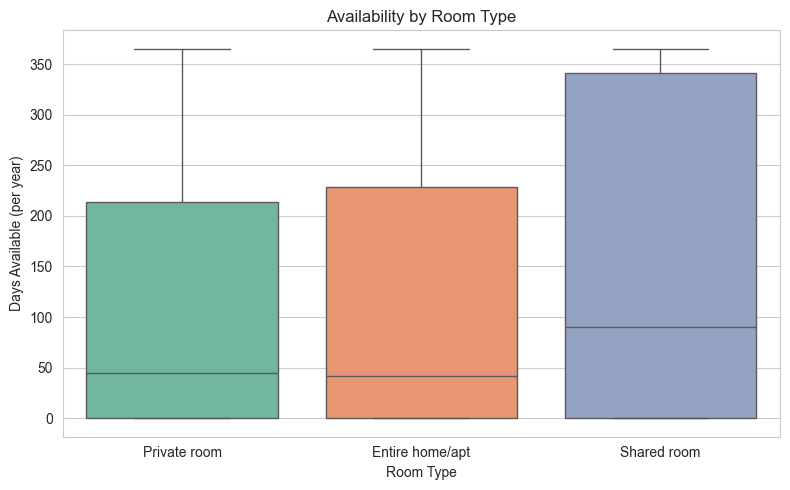

In [31]:
# Boxplot of availability_365 by room_type
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='room_type',
    y='availability_365',
    data=df,
    palette='Set2'
)
plt.title("Availability by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Days Available (per year)")
plt.tight_layout()
plt.show()


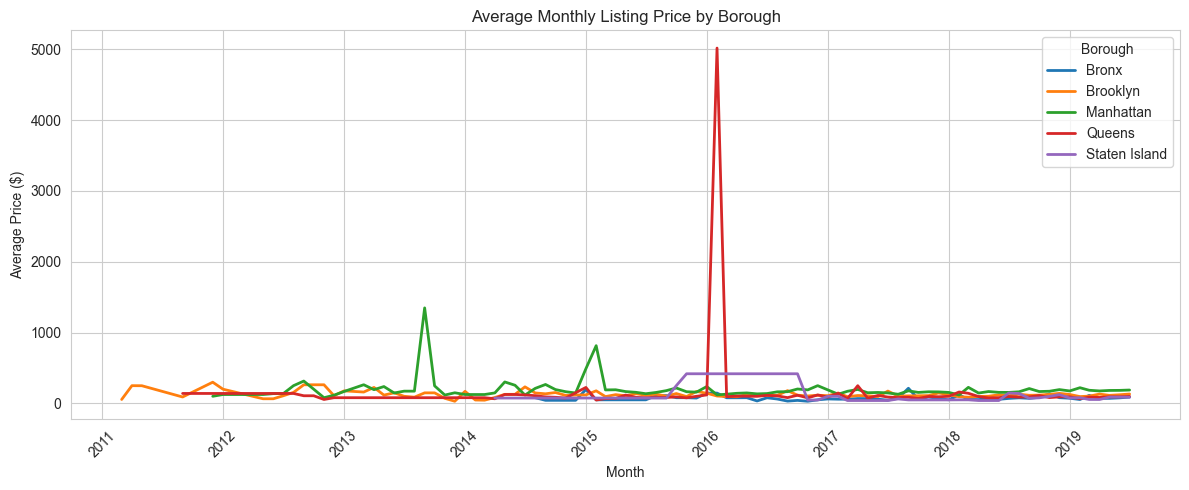

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load and parse the CSV (adjust the path as needed)
df = pd.read_csv("../data/AB_NYC_2019.csv")
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# 2) Create 'order_month' as year-month (Period) from last_review
df['order_month'] = df['last_review'].dt.to_period('M')

# 3) Group by (order_month, borough) → compute mean price → unstack to wide format
monthly_borough = (
    df
    .dropna(subset=['order_month'])
    .groupby(['order_month', 'neighbourhood_group'])['price']
    .mean()
    .unstack()      # each borough becomes its own column
    .ffill()        # forward-fill so missing months carry previous value
)
monthly_borough.index = monthly_borough.index.to_timestamp()

# 4) Plot each borough’s average price through time
plt.figure(figsize=(12, 5))
for borough in monthly_borough.columns:
    plt.plot(
        monthly_borough.index,
        monthly_borough[borough],
        label=borough,
        linewidth=2
    )

plt.title("Average Monthly Listing Price by Borough")
plt.xlabel("Month")
plt.ylabel("Average Price ($)")
plt.legend(title="Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


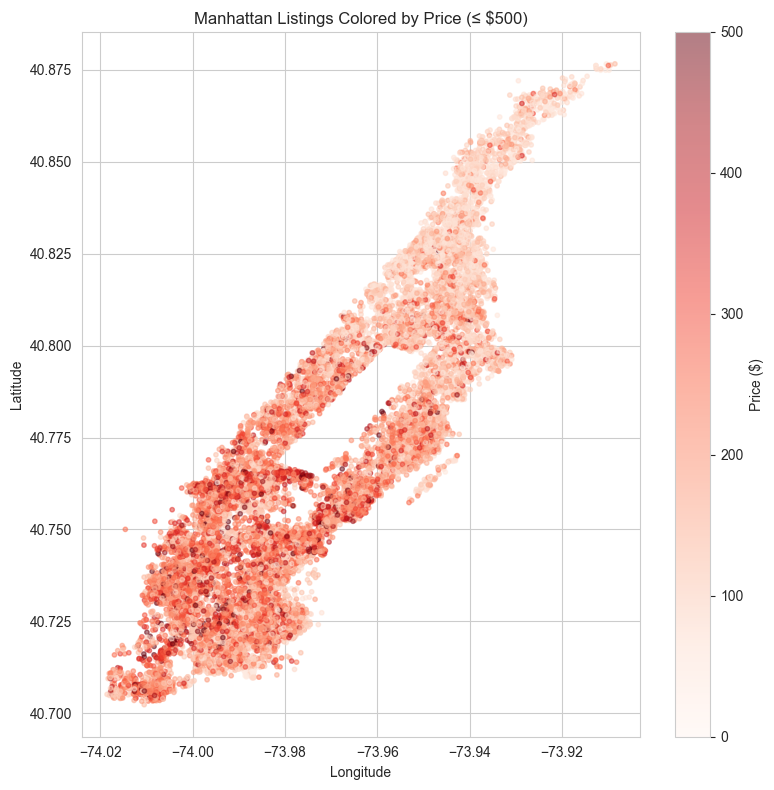

In [37]:
# Scatter of Manhattan listings by location, colored by price (≤ $500)
manhattan = df[(df['price'] <= 500) & (df['neighbourhood_group'] == 'Manhattan')]

plt.figure(figsize=(8, 8))
plt.scatter(
    manhattan['longitude'],
    manhattan['latitude'],
    c=manhattan['price'],
    cmap='Reds',
    alpha=0.5,
    s=10
)
plt.colorbar(label='Price ($)')
plt.title("Manhattan Listings Colored by Price (≤ $500)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [38]:
# Cell 34: Pivot median price by borough & room type
pivot_borough_room = (
    df
    .pivot_table(
        index='neighbourhood_group',
        columns='room_type',
        values='price',
        aggfunc='mean'
    )
    .round(2)
)
pivot_borough_room


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.51,66.79,59.80
Brooklyn,178.33,76.50,50.53
Manhattan,249.24,116.78,88.98
Queens,147.05,71.76,69.02
Staten Island,173.85,62.29,57.44


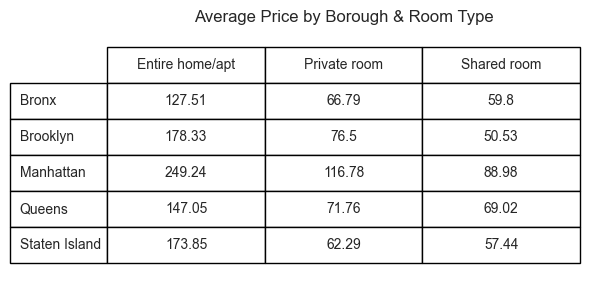

In [39]:
# Render as a table in Matplotlib
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')
table = ax.table(
    cellText=pivot_borough_room.values,
    rowLabels=pivot_borough_room.index,
    colLabels=pivot_borough_room.columns,
    cellLoc='center',
    loc='center'
)
table.scale(1, 2)
plt.title("Average Price by Borough & Room Type")
plt.tight_layout()
plt.show()


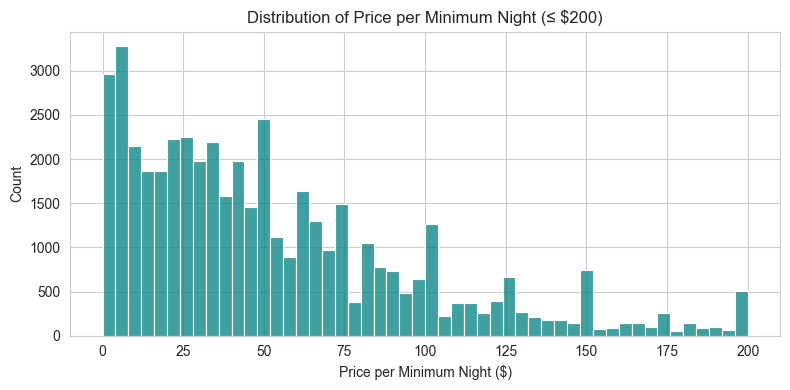

In [40]:
# 1) If you just reloaded df, recreate price_per_min_night:
df['price_per_min_night'] = df['price'] / df['minimum_nights']

# 2) Now filter and plot
clean_ppn = df[df['price_per_min_night'] <= 200]

plt.figure(figsize=(8, 4))
sns.histplot(
    clean_ppn['price_per_min_night'],
    bins=50,
    color='teal'
)
plt.title("Distribution of Price per Minimum Night (≤ $200)")
plt.xlabel("Price per Minimum Night ($)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
